# API Test Notebook

In [48]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '73c70b63-ab38-440d-bef6-e9ec676f7884',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-10-15T19:56:05.031Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 8895}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10494, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [49]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [50]:
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')
df

C:\Users\Cezar\AppData\Local\Temp\ipykernel_12584\3573487694.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19514693.00000,19514693.00000,False,NaN,1,NaN,NaN,None,2023-10-15T19:54:00.000Z,27010.54740,5409030856.69124,-25.42620,-0.16545,0.53247,-3.19328,2.19914,-7.22408,-9.55513,527102540291.80579,49.89210,567221495420.29004,None,2023-10-15T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 19:56:10.762193
1,1027,Ethereum,ETH,ethereum,7552,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120258135.50325,120258135.50325,True,NaN,2,NaN,NaN,None,2023-10-15T19:54:00.000Z,1559.92183,2448713423.06269,-27.16870,-0.27828,0.29408,-4.67711,-3.85618,-14.28039,-17.31208,187593290806.74945,17.75720,187593290806.75000,None,2023-10-15T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 19:56:10.762193
2,825,Tether USDt,USDT,tether,63714,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83527007239.14531,86625667477.81340,True,NaN,3,NaN,NaN,None,2023-10-15T19:54:00.000Z,1.00005,10729472000.55479,-14.42820,-0.00291,-0.00600,-0.04520,-0.01261,0.12296,-0.00858,83531348355.73727,7.90750,86630169639.87000,None,2023-10-15T19:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-15 19:56:10.762193
3,1839,BNB,BNB,bnb,1682,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153844807.73536,153844807.73536,False,NaN,4,NaN,NaN,None,2023-10-15T19:54:00.000Z,209.60955,340095191.24807,39.97240,-0.25629,1.50945,-1.04326,-1.27882,-10.51902,-13.54095,32247340330.09854,3.05270,32247340330.10000,None,2023-10-15T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 19:56:10.762193
4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53441027384.00000,99988362642.00000,False,NaN,5,NaN,NaN,None,2023-10-15T19:54:00.000Z,0.48821,360589042.65609,-17.85580,-0.33285,0.37835,-5.87638,-2.23862,-18.10240,-33.42588,26090309390.45182,2.46970,48820748154.75000,None,2023-10-15T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 19:56:10.762193
5,3408,USDC,USDC,usd-coin,14453,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25124539002.43670,25124539002.43670,False,NaN,6,NaN,NaN,None,2023-10-15T19:54:00.000Z,1.00004,1044715052.32113,-28.45110,-0.00987,-0.01170,0.00961,-0.00483,0.00223,0.00232,25125618135.85700,2.37820,25125618135.86000,None,2023-10-15T19:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-15 19:56:10.762193
6,5426,Solana,SOL,solana,535,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,416257859.49498,560033097.70652,True,NaN,7,NaN,NaN,None,2023-10-15T19:54:00.000Z,21.89165,160338161.93093,-36.16040,-0.15643,-0.69084,-6.21052,16.67061,-6.34355,-16.30231,9112572260.36878,0.86260,12260049761.56000,None,2023-10-15T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 19:56:10.762193
7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35211515802.34400,36259372926.66300,False,NaN,8,NaN,NaN,None,2023-10-15T19:54:00.000Z,0.24686,74443128.06039,-15.03170,-0.23549,-0.04401,-3.90644,-0.29303,-10.26207,-20.39563,8692159925.93613,0.82280,11108502083.89000,None,2023-10-15T19:54

In [5]:

def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '73c70b63-ab38-440d-bef6-e9ec676f7884',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df 
    
    
    if not os.path.isfile(r'C:\Users\Cezar\Desktop\Bootcamp\Python\API Test Notebook\API_Test.csv'):
        df.to_csv(r'C:\Users\Cezar\Desktop\Bootcamp\Python\API Test Notebook\API_Test.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Cezar\Desktop\Bootcamp\Python\API Test Notebook\API_Test.csv', mode = 'a', header = False)
    

In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(60)
exit()

{'status': {'timestamp': '2023-10-15T19:19:26.741Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 8895}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10494, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Cezar\AppData\Local\Temp\ipykernel_12584\190830955.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-10-15T19:20:27.309Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 8895}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10494, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Cezar\AppData\Local\Temp\ipykernel_12584\190830955.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-10-15T19:21:27.594Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 8895}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10494, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Cezar\AppData\Local\Temp\ipykernel_12584\190830955.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-10-15T19:22:28.173Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 8895}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10494, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Cezar\AppData\Local\Temp\ipykernel_12584\190830955.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-10-15T19:23:28.463Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 8895}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10494, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Cezar\AppData\Local\Temp\ipykernel_12584\190830955.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-10-15T19:24:28.985Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 8895}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10494, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Cezar\AppData\Local\Temp\ipykernel_12584\190830955.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


KeyboardInterrupt: 

In [ ]:
df22 = pd.read_csv(r'C:\Users\Cezar\Desktop\Bootcamp\Python\API Test Notebook\API_Test.csv')
df22

In [51]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19514693.00000,19514693.00000,False,NaN,1,NaN,NaN,None,2023-10-15T19:54:00.000Z,27010.54740,5409030856.69124,-25.42620,-0.16545,0.53247,-3.19328,2.19914,-7.22408,-9.55513,527102540291.80579,49.89210,567221495420.29004,None,2023-10-15T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 19:56:10.762193
1,1027,Ethereum,ETH,ethereum,7552,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120258135.50325,120258135.50325,True,NaN,2,NaN,NaN,None,2023-10-15T19:54:00.000Z,1559.92183,2448713423.06269,-27.16870,-0.27828,0.29408,-4.67711,-3.85618,-14.28039,-17.31208,187593290806.74945,17.75720,187593290806.75000,None,2023-10-15T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 19:56:10.762193
2,825,Tether USDt,USDT,tether,63714,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83527007239.14531,86625667477.81340,True,NaN,3,NaN,NaN,None,2023-10-15T19:54:00.000Z,1.00005,10729472000.55479,-14.42820,-0.00291,-0.00600,-0.04520,-0.01261,0.12296,-0.00858,83531348355.73727,7.90750,86630169639.87000,None,2023-10-15T19:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-15 19:56:10.762193
3,1839,BNB,BNB,bnb,1682,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153844807.73536,153844807.73536,False,NaN,4,NaN,NaN,None,2023-10-15T19:54:00.000Z,209.60955,340095191.24807,39.97240,-0.25629,1.50945,-1.04326,-1.27882,-10.51902,-13.54095,32247340330.09854,3.05270,32247340330.10000,None,2023-10-15T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 19:56:10.762193
4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53441027384.00000,99988362642.00000,False,NaN,5,NaN,NaN,None,2023-10-15T19:54:00.000Z,0.48821,360589042.65609,-17.85580,-0.33285,0.37835,-5.87638,-2.23862,-18.10240,-33.42588,26090309390.45182,2.46970,48820748154.75000,None,2023-10-15T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 19:56:10.762193
5,3408,USDC,USDC,usd-coin,14453,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25124539002.43670,25124539002.43670,False,NaN,6,NaN,NaN,None,2023-10-15T19:54:00.000Z,1.00004,1044715052.32113,-28.45110,-0.00987,-0.01170,0.00961,-0.00483,0.00223,0.00232,25125618135.85700,2.37820,25125618135.86000,None,2023-10-15T19:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-15 19:56:10.762193
6,5426,Solana,SOL,solana,535,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,416257859.49498,560033097.70652,True,NaN,7,NaN,NaN,None,2023-10-15T19:54:00.000Z,21.89165,160338161.93093,-36.16040,-0.15643,-0.69084,-6.21052,16.67061,-6.34355,-16.30231,9112572260.36878,0.86260,12260049761.56000,None,2023-10-15T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 19:56:10.762193
7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35211515802.34400,36259372926.66300,False,NaN,8,NaN,NaN,None,2023-10-15T19:54:00.000Z,0.24686,74443128.06039,-15.03170,-0.23549,-0.04401,-3.90644,-0.29303,-10.26207,-20.39563,8692159925.93613,0.82280,11108502083.89000,None,2023-10-15T19:54

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df 

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19514693.00000,19514693.00000,False,NaN,1,NaN,NaN,None,2023-10-15T19:23:00.000Z,27045.10837,5384463801.91321,-25.99550,0.28467,0.63134,-3.11420,2.35552,-7.03712,-9.43758,527776987016.27234,49.87870,567947275795.81995,None,2023-10-15T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 19:24:27.741445
1,1027,Ethereum,ETH,ethereum,7552,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120258135.50325,120258135.50325,True,NaN,2,NaN,NaN,None,2023-10-15T19:23:00.000Z,1561.39012,2436685886.71533,-27.74830,0.24238,0.38333,-4.59956,-3.75758,-14.17749,-17.21112,187769864258.95755,17.75100,187769864258.95999,None,2023-10-15T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 19:24:27.741445
2,825,Tether USDt,USDT,tether,63714,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83527007239.14531,86625667477.81340,True,NaN,3,NaN,NaN,None,2023-10-15T19:23:00.000Z,1.00009,10690065871.10697,-14.85290,0.00024,-0.00038,-0.04218,-0.01219,0.11798,-0.01514,83534222874.62613,7.89700,86633150796.81000,None,2023-10-15T19:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-15 19:24:27.741445
3,1839,BNB,BNB,bnb,1682,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153844807.73536,153844807.73536,False,NaN,4,NaN,NaN,None,2023-10-15T19:23:00.000Z,209.85216,340128897.46466,39.51520,0.00772,1.56553,-0.93728,-1.11871,-10.41261,-13.26457,32284664512.97414,3.05210,32284664512.97000,None,2023-10-15T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 19:24:27.741445
4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53441027384.00000,99988362642.00000,False,NaN,5,NaN,NaN,None,2023-10-15T19:23:00.000Z,0.48876,357790539.82206,-18.96200,-0.13715,0.50903,-5.75246,-1.69078,-18.09500,-33.20244,26119675396.40078,2.46920,48875698456.76000,None,2023-10-15T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 19:24:27.741445
5,3408,USDC,USDC,usd-coin,14452,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25124539002.43670,25124539002.43670,False,NaN,6,NaN,NaN,None,2023-10-15T19:23:00.000Z,1.00010,1035355254.66748,-29.69000,-0.00121,-0.00539,0.01520,-0.01440,0.00441,0.01159,25126972032.93111,2.37440,25126972032.93000,None,2023-10-15T19:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-15 19:24:27.741445
6,5426,Solana,SOL,solana,535,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,416257859.49498,560033097.70652,True,NaN,7,NaN,NaN,None,2023-10-15T19:23:00.000Z,21.93271,159904122.89075,-36.49700,0.21515,-0.46936,-6.28309,17.32010,-6.11339,-16.37964,9129663105.28720,0.86310,12283043775.02000,None,2023-10-15T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 19:24:27.741445
7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35211515802.34400,36259372926.66300,False,NaN,8,NaN,NaN,None,2023-10-15T19:23:00.000Z,0.24718,73609043.42628,-16.53450,0.06343,0.02180,-3.84825,0.18832,-10.16013,-20.21350,8703709356.91117,0.82280,11123262152.63000,None,2023-10-15T19:23:00.000Z

In [10]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.28467,0.63134,-3.11420,2.35552,-7.03712,-9.43758
Ethereum,0.24238,0.38333,-4.59956,-3.75758,-14.17749,-17.21112
Tether USDt,0.00024,-0.00038,-0.04218,-0.01219,0.11798,-0.01514
BNB,0.00772,1.56553,-0.93728,-1.11871,-10.41261,-13.26457
XRP,-0.13715,0.50903,-5.75246,-1.69078,-18.09500,-33.20244
USDC,-0.00121,-0.00539,0.01520,-0.01440,0.00441,0.01159
Solana,0.21515,-0.46936,-6.28309,17.32010,-6.11339,-16.37964
Cardano,0.06343,0.02180,-3.84825,0.18832,-10.16013,-20.21350
Dogecoin,0.13071,0.34365,-2.53879,-3.82272,-13.81010,-13.54614


In [11]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.28467
             quote.USD.percent_change_24h     0.63134
             quote.USD.percent_change_7d     -3.11420
             quote.USD.percent_change_30d     2.35552
             quote.USD.percent_change_60d    -7.03712
             quote.USD.percent_change_90d    -9.43758
Ethereum     quote.USD.percent_change_1h      0.24238
             quote.USD.percent_change_24h     0.38333
             quote.USD.percent_change_7d     -4.59956
             quote.USD.percent_change_30d    -3.75758
             quote.USD.percent_change_60d   -14.17749
             quote.USD.percent_change_90d   -17.21112
Tether USDt  quote.USD.percent_change_1h      0.00024
             quote.USD.percent_change_24h    -0.00038
             quote.USD.percent_change_7d     -0.04218
             quote.USD.percent_change_30d    -0.01219
             quote.USD.percent_change_60d     0.11798
             quote.USD.percent_change_90

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.28467
            quote.USD.percent_change_24h   0.63134
            quote.USD.percent_change_7d   -3.11420
            quote.USD.percent_change_30d   2.35552
            quote.USD.percent_change_60d  -7.03712
            quote.USD.percent_change_90d  -9.43758
Ethereum    quote.USD.percent_change_1h    0.24238
            quote.USD.percent_change_24h   0.38333
            quote.USD.percent_change_7d   -4.59956
            quote.USD.percent_change_30d  -3.75758
            quote.USD.percent_change_60d -14.17749
            quote.USD.percent_change_90d -17.21112
Tether USDt quote.USD.percent_change_1h    0.00024
            quote.USD.percent_change_24h  -0.00038
            quote.USD.percent_change_7d   -0.04218
            quote.USD.percent_change_30d  -0.01219
            quote.USD.percent_change_60d   0.11798
            quote.USD.percent_change_90d  -0.01514
BNB         quote.USD.percent_change_1h    0.00772
            quote.USD.percent_change_24h   1.56553
            quote.USD.percent_change_7d   -0.93728
            quote.USD.percent_change_30d  -1.11871
            quote.USD.percent_change_60d -10.41261
            quote.USD.percent_change_90d -13.26457
XRP         quote.USD.percent_change_1h   -0.13715
            quote.USD.percent_change_24h   0.50903
            quote.USD.percent_change_7d   -5.75246
            quote.USD.percent_change_30d  -1.69078
            quote.USD.percent_change_60d -18.09500
            quote.USD.percent_change_90d -33.20244
USDC        quote.USD.percent_change_1h   -0.00121
            quote.USD.percent_change_24h  -0.00539
            quote.USD.percent_change_7d    0.01520
            quote.USD.percent_change_30d  -0.01440
            quote.USD.percent_change_60d   0.00441
            quote.USD.percent_change_90d   0.01159
Solana      quote.USD.percent_change_1h    0.21515
            quote.USD.percent_change_24h  -0.46936
            quote.USD.percent_change_7d   -6.28309
            quote.USD.percent_change_30d  17.32010
            quote.USD.percent_change_60d  -6.11339
            quote.USD.percent_change_90d -16.37964
Cardano     quote.USD.percent_change_1h    0.06343
            quote.USD.percent_change_24h   0.02180
            quote.USD.percent_change_7d   -3.84825
            quote.USD.percent_change_30d   0.18832
            quote.USD.percent_change_60d -10.16013
            quote.USD.percent_change_90d -20.21350
Dogecoin    quote.USD.percent_change_1h    0.13071
            quote.USD.percent_change_24h   0.34365
            quote.USD.percent_change_7d   -2.53879
            quote.USD.percent_change_30d  -3.82272
            quote.USD.percent_change_60d -13.81010
            quote.USD.percent_change_90d -13.54614
TRON        quote.USD.percent_change_1h    0.08194
            quote.USD.percent_change_24h   0.85765
            quote.USD.percent_change_7d   -2.40277
            quote.USD.percent_change_30d   2.80328
            quote.USD.percent_change_60d  13.91607
            quote.USD.percent_change_90d   8.59929
Toncoin     quote.USD.percent_change_1h   -0.05026
            quote.USD.percent_change_24h   0.55686
            quote.USD.percent_change_7d   -6.79979
            quote.USD.percent_change_30d  -5.97528
            quote.USD.percent_change_60d  36.41316
            quote.USD.percent_change_90d  43.31998
Dai         quote.USD.percent_change_1h   -0.02150
            quote.USD.percent_change_24h   0.00694
            quote.USD.percent_change_7d    0.00546
            quote.USD.percent_change_30d  -0.00150
            quote.USD.percent_change_60d   0.03673
            quote.USD.percent_change_90d   0.11571
Polygon     quote.USD.percent_change_1h    0.17668
            quote.USD.percent_change_24h  -0.22144
            quote.USD.percent_change_7d   -8.06442
            quote.USD.percent_change_30d  -0.66102
            quote.USD.percent_change_60d -17.54154
            quo

In [14]:
df5.count()

values    90
dtype: int64

In [28]:
index = pd.Index(range(90))
                 
df6 = df5.reset_index()
df6                 

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.28467
1,Bitcoin,quote.USD.percent_change_24h,0.63134
2,Bitcoin,quote.USD.percent_change_7d,-3.11420
3,Bitcoin,quote.USD.percent_change_30d,2.35552
4,Bitcoin,quote.USD.percent_change_60d,-7.03712
5,Bitcoin,quote.USD.percent_change_90d,-9.43758
6,Ethereum,quote.USD.percent_change_1h,0.24238
7,Ethereum,quote.USD.percent_change_24h,0.38333
8,Ethereum,quote.USD.percent_change_7d,-4.59956
9,Ethereum,quote.USD.percent_change_30d,-3.75758


In [29]:
df7 = df6.rename(columns = {'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.28467
1,Bitcoin,quote.USD.percent_change_24h,0.63134
2,Bitcoin,quote.USD.percent_change_7d,-3.11420
3,Bitcoin,quote.USD.percent_change_30d,2.35552
4,Bitcoin,quote.USD.percent_change_60d,-7.03712
5,Bitcoin,quote.USD.percent_change_90d,-9.43758
6,Ethereum,quote.USD.percent_change_1h,0.24238
7,Ethereum,quote.USD.percent_change_24h,0.38333
8,Ethereum,quote.USD.percent_change_7d,-4.59956
9,Ethereum,quote.USD.percent_change_30d,-3.75758


In [30]:
df7 ['percent_change'] = df7 ['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d' ],['1h','24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.28467
1,Bitcoin,24h,0.63134
2,Bitcoin,7d,-3.11420
3,Bitcoin,30d,2.35552
4,Bitcoin,60d,-7.03712
5,Bitcoin,90d,-9.43758
6,Ethereum,1h,0.24238
7,Ethereum,24h,0.38333
8,Ethereum,7d,-4.59956
9,Ethereum,30d,-3.75758


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

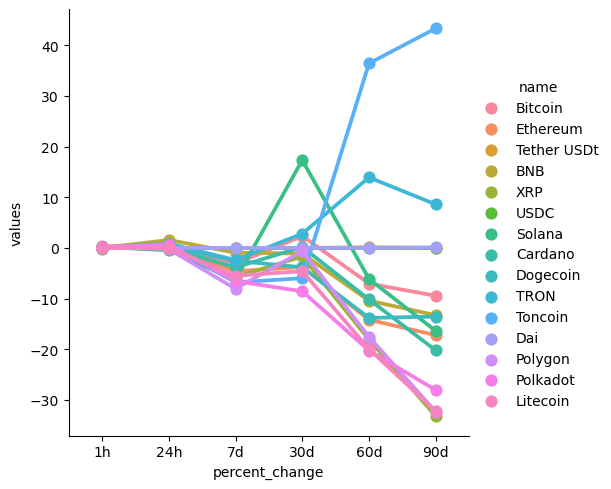

In [31]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [52]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Litecoin'")
df8

,name,quote.USD.price,timestamp
14,Litecoin,61.79684,2023-10-15 19:56:10.762193


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

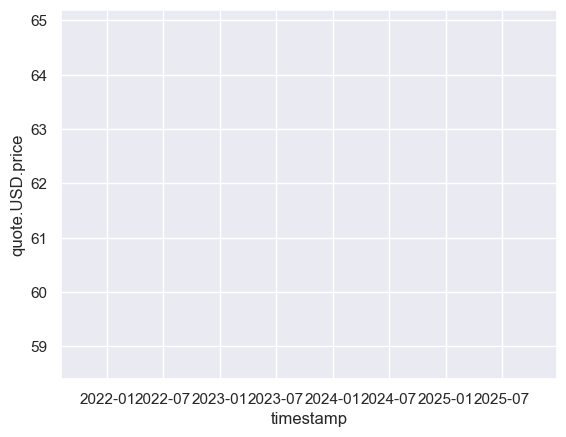

In [53]:
sns.set_theme(style = 'darkgrid')

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df8)